# `다항`회귀 - 보스턴 집값 예측하기
- `Polynomial` Regression
## 다항회귀 수행
### 1) 패키지 준비

In [1]:
import sys
sys.path.append('../../')
import helper

from pandas import read_excel, DataFrame, merge
from matplotlib import pyplot as plt
import seaborn as sb
import numpy as np

from sklearn.model_selection import train_test_split        # 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

from tensorflow.keras.models import Sequential              # 순서층을 구성하는 모델 객체 생성 기능
from tensorflow.keras.layers import Dense                   # 모델 객체에 학습층을 쌓기 위한 클래스
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

### 2) 데이터셋 준비

In [2]:
origin = read_excel('https://data.hossam.kr/E04/boston.xlsx')
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CRIM       506 non-null    float64
 1   ZN         506 non-null    float64
 2   INDUS      506 non-null    float64
 3   CHAS       506 non-null    int64  
 4   NOX        506 non-null    float64
 5   RM         506 non-null    float64
 6   AGE        506 non-null    float64
 7   DIS        506 non-null    float64
 8   RAD        506 non-null    int64  
 9   TAX        506 non-null    int64  
 10  PTRATIO    506 non-null    float64
 11  B          506 non-null    float64
 12  LSTAT      506 non-null    float64
 13  MEDV       506 non-null    float64
 14  CAT. MEDV  506 non-null    int64  
dtypes: float64(11), int64(4)
memory usage: 59.4 KB


### 3) 데이터 전처리
- 결측치 확인
> 데이터에 결측치가 없으므로 생략

### 4) 탐색적 데이터 분석
- 명목형 처리

In [3]:
origin['CHAS'] = origin['CHAS'].astype('category')
origin['CAT. MEDV'] = origin['CAT. MEDV'].astype('category')
origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CRIM       506 non-null    float64 
 1   ZN         506 non-null    float64 
 2   INDUS      506 non-null    float64 
 3   CHAS       506 non-null    category
 4   NOX        506 non-null    float64 
 5   RM         506 non-null    float64 
 6   AGE        506 non-null    float64 
 7   DIS        506 non-null    float64 
 8   RAD        506 non-null    int64   
 9   TAX        506 non-null    int64   
 10  PTRATIO    506 non-null    float64 
 11  B          506 non-null    float64 
 12  LSTAT      506 non-null    float64 
 13  MEDV       506 non-null    float64 
 14  CAT. MEDV  506 non-null    category
dtypes: category(2), float64(11), int64(2)
memory usage: 52.7 KB


- 기본통계 확인

In [4]:
origin.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


- 상자그림

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

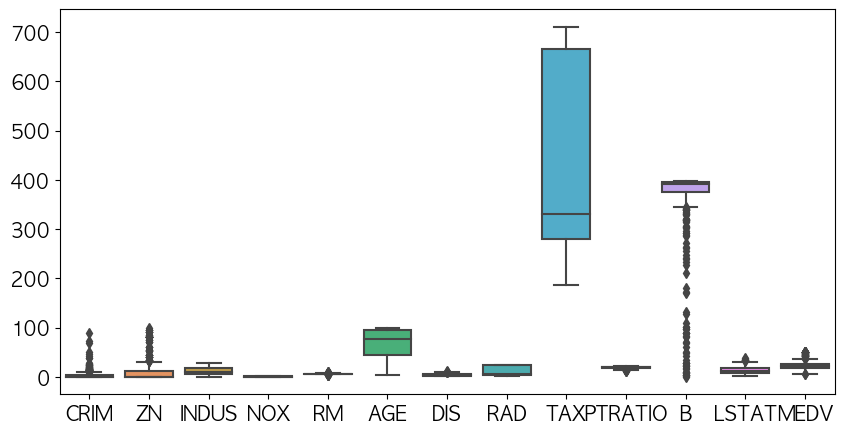

In [5]:
plt.figure(figsize=(10, 5))
sb.boxplot(data=origin)
plt.show()
plt.close()

- 제외하기로 한 독립변수 제거
> 상관계수의 절대값이 0.7이상인 항목을 순차적으로 제거하여 회귀분석에 사용할 요인을 선정
> 
> 앞 예제 (8_다중선형회귀(집값예측)) 참조!

In [6]:
x = origin.drop(['TAX', 'DIS', 'NOX', 'INDUS'], axis=1)
x

,CRIM,ZN,CHAS,RM,AGE,RAD,PTRATIO,B,LSTAT,MEDV,CAT. MEDV
0,0.00632,18.0,0,6.575,65.2,1,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,0,6.421,78.9,2,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,0,7.185,61.1,2,17.8,392.83,4.03,34.7,1
3,0.03237,0.0,0,6.998,45.8,3,18.7,394.63,2.94,33.4,1
4,0.06905,0.0,0,7.147,54.2,3,18.7,396.90,5.33,36.2,1
...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,0,6.593,69.1,1,21.0,391.99,9.67,22.4,0
502,0.04527,0.0,0,6.120,76.7,1,21.0,396.90,9.08,20.6,0
503,0.06076,0.0,0,6.976,91.0,1,21.0,396.90,5.64,23.9,0
504,0.10959,0.0,0,6.794,89.3,1,21.0,393.45,6.48,22.0,0


- 명목형 변수만 추출

In [7]:
categorical_df = x.filter(['CHAS', 'CAT. MEDV'])
categorical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   CHAS       506 non-null    category
 1   CAT. MEDV  506 non-null    category
dtypes: category(2)
memory usage: 1.4 KB


- 종속변수만 추출

In [8]:
y = x['MEDV']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

- 데이터프레임에서 추출한 필드를 제거

In [9]:
x.drop(['CHAS', 'CAT. MEDV', 'MEDV'], axis=1, inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   RM       506 non-null    float64
 3   AGE      506 non-null    float64
 4   RAD      506 non-null    int64  
 5   PTRATIO  506 non-null    float64
 6   B        506 non-null    float64
 7   LSTAT    506 non-null    float64
dtypes: float64(7), int64(1)
memory usage: 31.8 KB


### 5) 데이터셋 분할
- 랜덤시드 고정

In [10]:
np.random.seed(777)

- 데이터 표준화

In [11]:
x_scaler = StandardScaler()
x_scale = x_scaler.fit_transform(x)
x_scale

array([[-0.41978194,  0.28482986,  0.41367189, ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236,  0.19427445, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236,  1.28271368, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.98496002, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.72567214, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236, -0.36276709, ...,  1.17646583,
         0.44105193, -0.66905833]])

- 표준화된 독립변수를 다항식으로 변환

In [12]:
x_scale_df = DataFrame(x_scale, columns=x.columns)
x_scale_df

my_poly = PolynomialFeatures(degree = 2, include_bias = False)
my_fit = my_poly.fit_transform(x_scale_df)
x2 = DataFrame(my_fit, columns=my_poly.get_feature_names_out())
x2.head()

,CRIM,ZN,RM,AGE,RAD,PTRATIO,B,LSTAT,CRIM^2,CRIM ZN,...,RAD^2,RAD PTRATIO,RAD B,RAD LSTAT,PTRATIO^2,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2
0,-0.419782,0.284830,0.413672,-0.120013,-0.982843,-1.459000,0.441052,-1.075562,0.176217,-0.119566,...,0.965980,1.433968,-0.433485,1.057109,2.128682,-0.643495,1.569246,0.194527,-0.474379,1.156834
1,-0.417339,-0.487722,0.194274,0.367166,-0.867883,-0.303094,0.441052,-0.492439,0.174172,0.203546,...,0.753220,0.263050,-0.382781,0.427380,0.091866,-0.133680,0.149255,0.194527,-0.217191,0.242497
2,-0.417342,-0.487722,1.282714,-0.265812,-0.867883,-0.303094,0.396427,-1.208727,0.174174,0.203547,...,0.753220,0.263050,-0.344052,1.049033,0.091866,-0.120155,0.366358,0.157154,-0.479172,1.461022
3,-0.416750,-0.487722,1.016303,-0.809889,-0.752922,0.113032,0.416163,-1.361517,0.173681,0.203258,...,0.566892,-0.085104,-0.313338,1.025116,0.012776,0.047040,-0.153895,0.173192,-0.566613,1.853728
4,-0.412482,-0.487722,1.228577,-0.511180,-0.752922,0.113032,0.441052,-1.026501,0.170141,0.201177,...,0.566892,-0.085104,-0.332078,0.772876,0.012776,0.049853,-0.116028,0.194527,-0.452740,1.053705


- 분리해 놓은 명목형 데이터와 결합

In [13]:
x_df = merge(x2, categorical_df, left_index=True, right_index=True)
x_df.head()
x_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 46 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   CRIM           506 non-null    float64 
 1   ZN             506 non-null    float64 
 2   RM             506 non-null    float64 
 3   AGE            506 non-null    float64 
 4   RAD            506 non-null    float64 
 5   PTRATIO        506 non-null    float64 
 6   B              506 non-null    float64 
 7   LSTAT          506 non-null    float64 
 8   CRIM^2         506 non-null    float64 
 9   CRIM ZN        506 non-null    float64 
 10  CRIM RM        506 non-null    float64 
 11  CRIM AGE       506 non-null    float64 
 12  CRIM RAD       506 non-null    float64 
 13  CRIM PTRATIO   506 non-null    float64 
 14  CRIM B         506 non-null    float64 
 15  CRIM LSTAT     506 non-null    float64 
 16  ZN^2           506 non-null    float64 
 17  ZN RM          506 non-null    floa

- 훈련 데이터와 검증 데이터로 분할

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x_df, 
                                                    y,
                                                    test_size=0.3,
                                                     random_state=777 )
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 46), (152, 46), (354,), (152,))

### 6) 모델 개발
- 모델 정의

In [15]:
my_model = Sequential()

# 1차원의 데이터를 입력으로 받고, 64개의 출력을 가지는 첫번째 Dense층
my_model.add(Dense(64, activation = 'relu', input_shape = (len(x_train.columns), )))
my_model.add(Dense(32, activation = 'relu'))

# 하나의 값을 출력 정답의 범위가 정해지지 않기 때문에 활성화 합수는 linear
my_model.add(Dense(1, activation = 'linear'))

my_model.compile(optimizer = 'adam', loss='mse', metrics=['mae'])
my_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                3008      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 5121 (20.00 KB)
Trainable params: 5121 (20.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 7) 학습하기

In [16]:
result = my_model.fit(x_train, 
                      y_train, 
                      epochs=500, 
                      validation_data=(x_test, y_test),
                      callbacks = [EarlyStopping(monitor='val_loss',
                                                 patience=10,
                                                 verbose=1),
                                   ReduceLROnPlateau(monitor='val_loss',
                                                     patience=3,
                                                     factor=0.5,
                                                     min_lr=0.001,
                                                     verbose=1)])

Epoch 1/500
 1/12 [=>............................] - ETA: 1s - loss: 657.3653 - mae: 24.5061

12/12 [==============================] - 0s 8ms/step - loss: 574.4155 - mae: 22.1473 - val_loss: 528.5828 - val_mae: 21.2170 - lr: 0.0010
Epoch 2/500
12/12 [==============================] - 0s 2ms/step - loss: 512.4225 - mae: 20.8745 - val_loss: 467.5343 - val_mae: 19.6454 - lr: 0.0010
Epoch 3/500
12/12 [==============================] - 0s 2ms/step - loss: 448.0484 - mae: 19.4426 - val_loss: 398.2355 - val_mae: 18.0602 - lr: 0.0010
Epoch 4/500
12/12 [==============================] - 0s 2ms/step - loss: 374.9636 - mae: 17.5943 - val_loss: 327.0797 - val_mae: 16.3213 - lr: 0.0010
Epoch 5/500
12/12 [==============================] - 0s 2ms/step - loss: 308.8105 - mae: 15.5992 - val_loss: 266.8709 - val_mae: 14.5366 - lr: 0.0010
Epoch 6/500
12/12 [==============================] - 0s 2ms/step - loss: 253.1614 - mae: 14.0051 - val_loss: 223.4761 - val_mae: 13.0762 - lr: 0.0010
Epoch 7/500
12/12 [==============================] - 0s 2ms/step - loss: 211.7656 - mae: 12.8591 - val_loss: 182

### 7) 학습 결과 평가

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning

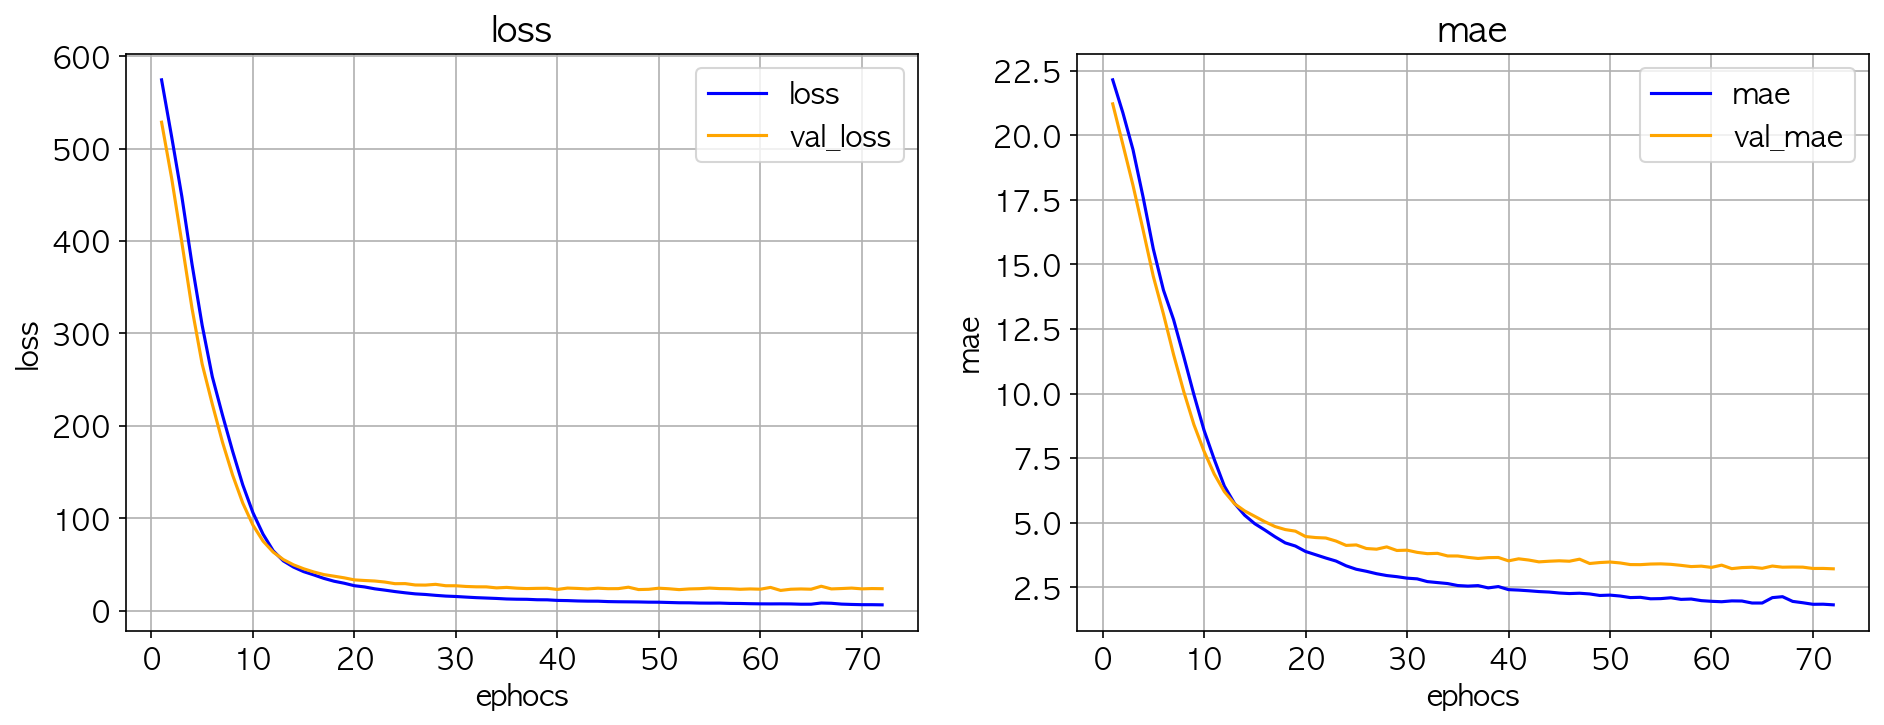

12/12 [==============================] - 0s 548us/step - loss: 6.1402 - mae: 1.7834
최종 훈련 손실률: 6.140175, 최종 훈련 절대오차: 1.783428
5/5 [==============================] - 0s 601us/step - loss: 23.7765 - mae: 3.2116
최종 검증 손실률: 23.776468, 최종 검증 절대오차: 3.211570


In [17]:
helper.tf_result_plot(result)

evaluate1 = my_model.evaluate(x_train, y_train)
print('최종 훈련 손실률: %f, 최종 훈련 절대오차: %f' % (evaluate1[0], evaluate1[1]))

evaluate2 = my_model.evaluate(x_test, y_test)
print('최종 검증 손실률: %f, 최종 검증 절대오차: %f' % (evaluate2[0], evaluate2[1]))

### 8) 학습 결과 적용
- 테스트 데이터에 대한 예측 결과 산정

In [18]:
train_pred = my_model.predict(x_train)
test_pred = my_model.predict(x_test)

5/5 [==============================] - 0s 537us/step


- 결과 데이터셋 구성

In [19]:
train_df = DataFrame(x_train, columns=x_train.columns)
train_df['관측치'] = y_train.values
train_df['예측치'] = train_pred.flatten()
train_df['훈련오차'] = train_df['관측치'] - train_df['예측치']
train_df.head()

test_df = DataFrame(x_test, columns=x_train.columns)
test_df['관측치'] = y_test.values
test_df['예측치'] = test_pred.flatten()
test_df['훈련오차'] = test_df['관측치']-test_df['예측치']
test_df.head()

,CRIM,ZN,RM,AGE,RAD,PTRATIO,B,LSTAT,CRIM^2,CRIM ZN,...,PTRATIO B,PTRATIO LSTAT,B^2,B LSTAT,LSTAT^2,CHAS,CAT. MEDV,관측치,예측치,훈련오차
207,-0.391193,-0.487722,-0.714658,0.146691,-0.637962,0.066796,0.359148,0.757911,0.153032,0.190793,...,0.023990,0.050625,0.128987,0.272202,0.574429,0,0,22.5,20.041632,2.458368
425,1.425197,-0.487722,-0.553671,0.953916,1.661245,0.806576,-3.826496,1.645211,2.031186,-0.695100,...,-3.086359,1.326987,14.642069,-6.295392,2.706719,0,0,8.3,14.834519,-6.534519
408,0.441097,-0.487722,-0.951151,1.042817,1.661245,0.806576,-0.460876,1.926960,0.194567,-0.215133,...,-0.371732,1.554239,0.212407,-0.888090,3.713175,0,0,17.2,9.984997,7.215003
63,-0.405796,0.585267,0.680083,-0.895234,-0.178120,0.575395,0.426579,-0.441977,0.164671,-0.237499,...,0.245451,-0.254311,0.181970,-0.188538,0.195343,0,0,25.0,21.294022,3.705978
290,-0.416442,2.945843,0.821124,-1.446423,-0.637962,0.344213,0.441052,-1.306849,0.173424,-1.226773,...,0.151816,-0.449835,0.194527,-0.576388,1.707854,0,0,28.5,30.540234,-2.040234


- 실제 결과값과 머신러닝에 의한 예측값 비교

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

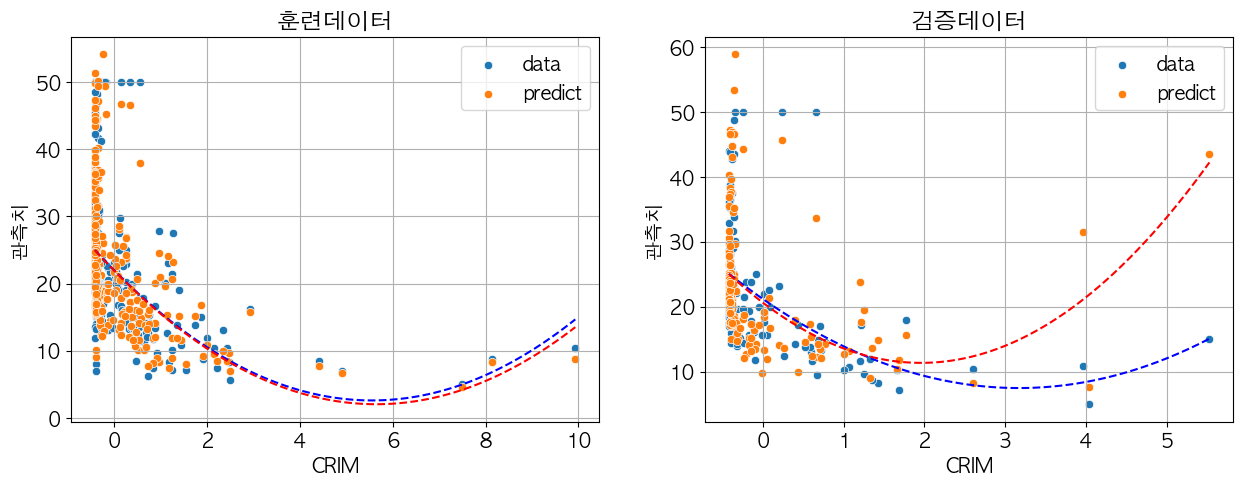

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

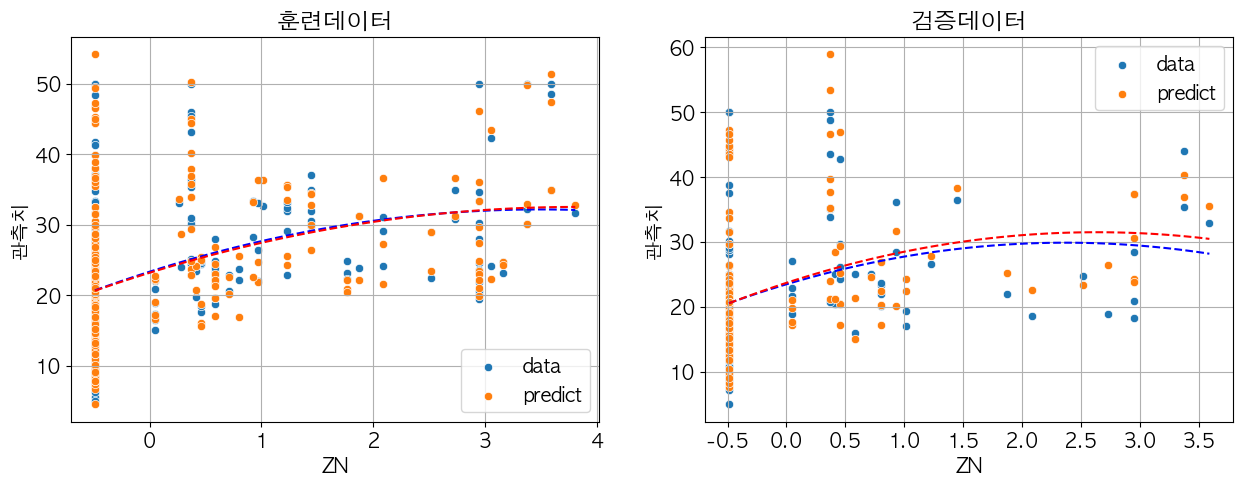

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

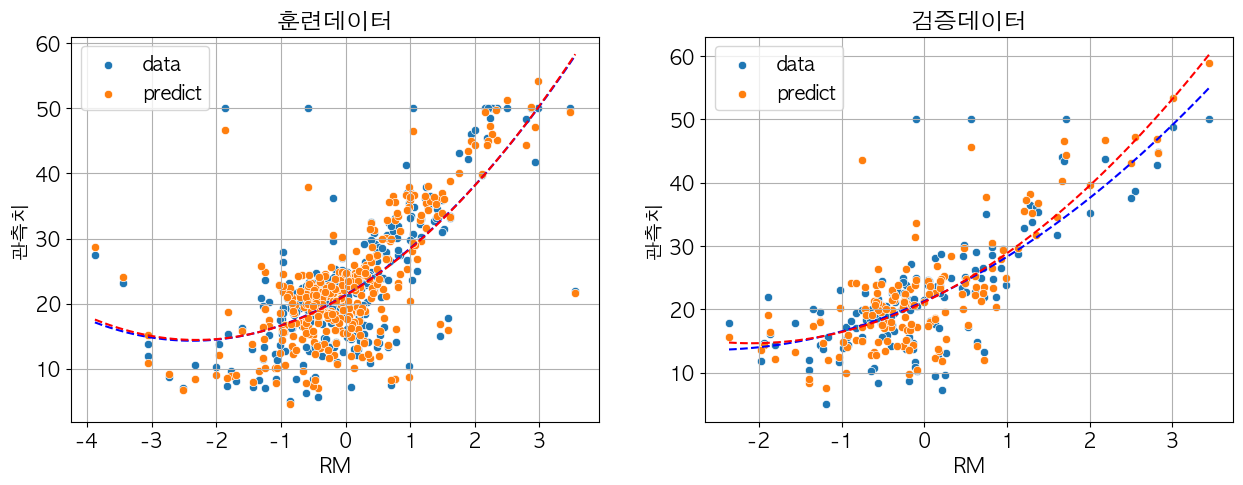

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

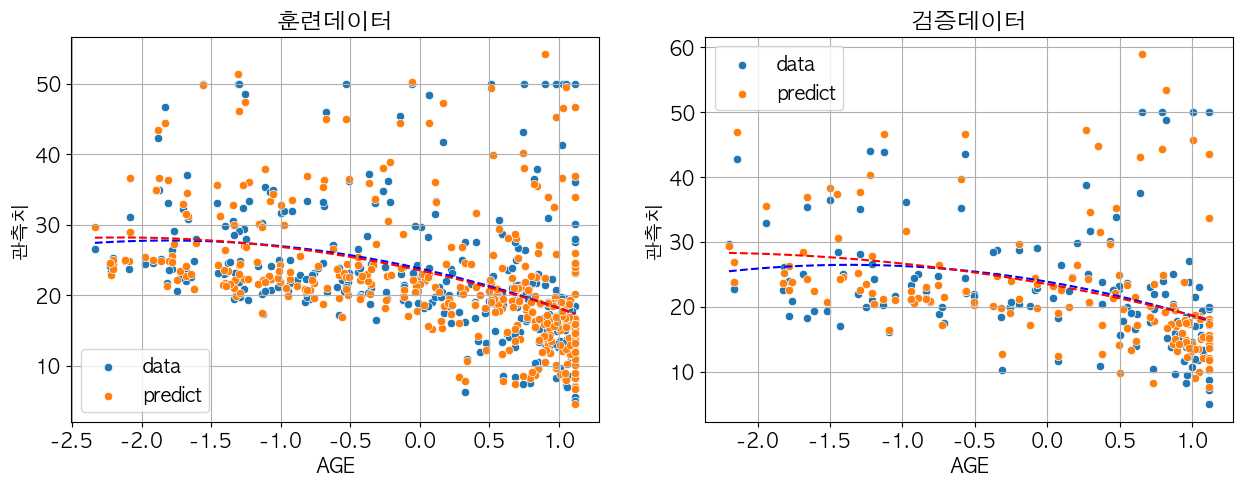

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

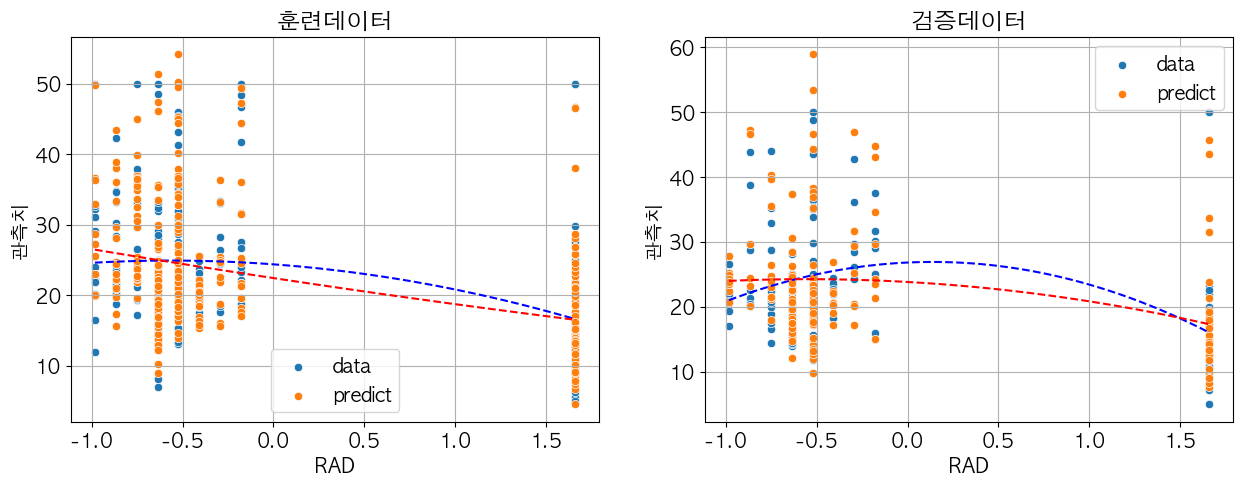

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

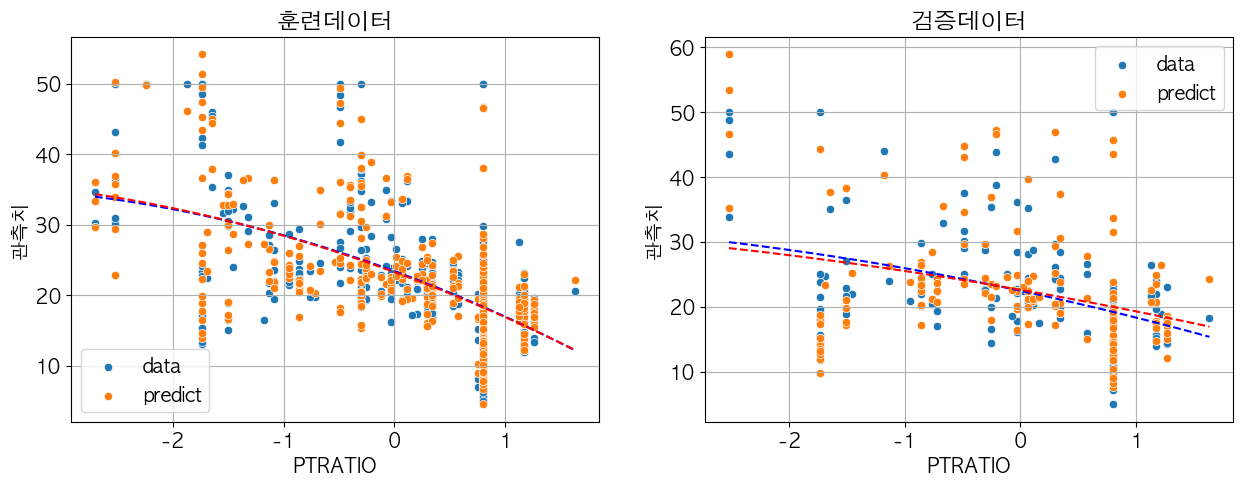

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

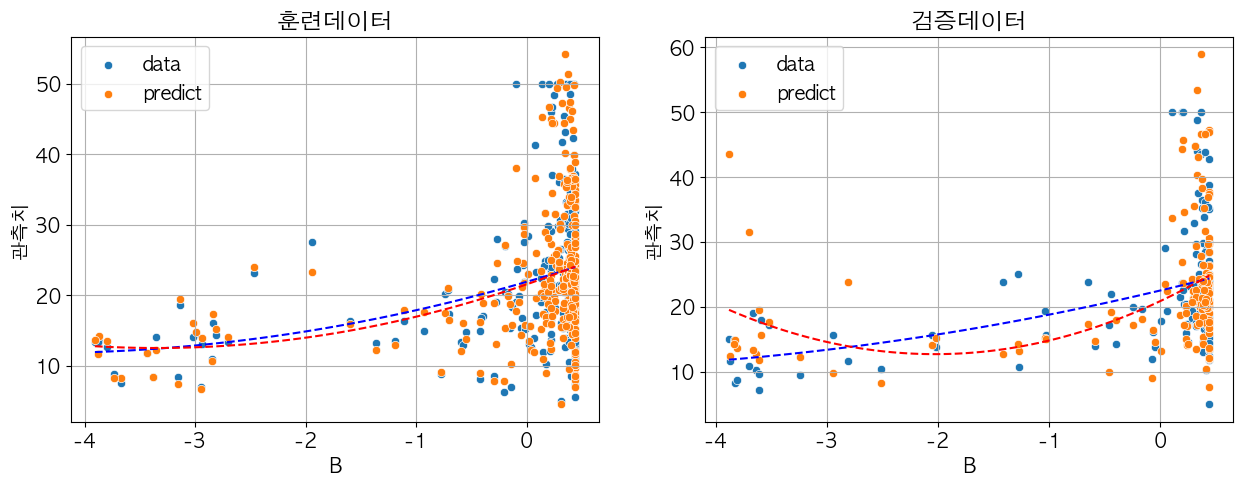

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

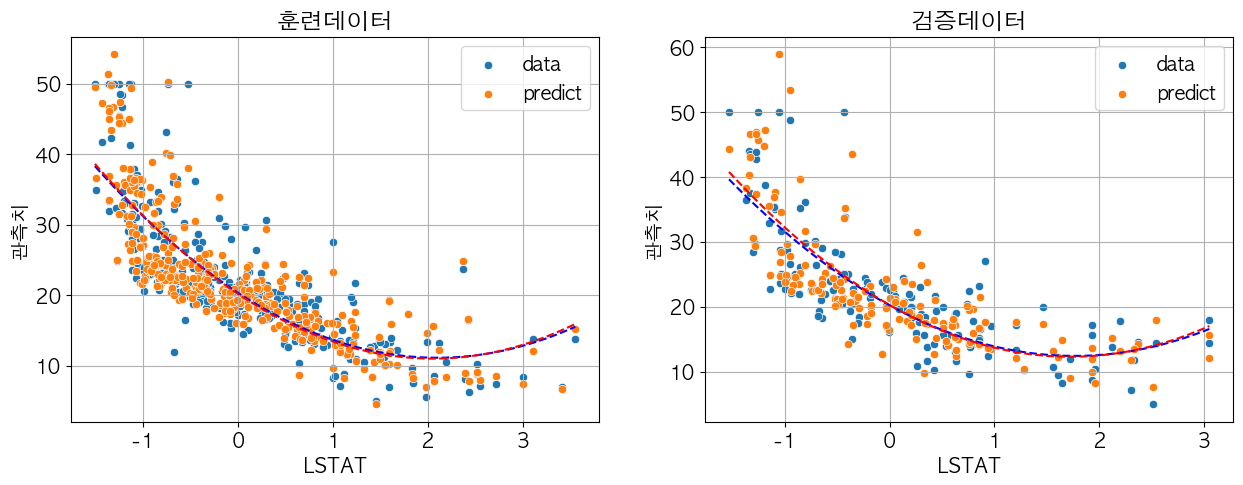

In [26]:
for key in ['CRIM','ZN','RM','AGE','RAD','PTRATIO','B','LSTAT']:
    helper.regplot(train_df[key], train_df['관측치'], train_df['예측치'], "훈련데이터",
                   test_df[key], test_df['관측치'], test_df['예측치'], "검증데이터",
                   figsize=(15, 5))
    
# 'CHAS' -> 더미변수는 어떻함?

> 예전 예제인 다중선형회귀와 손실률과 절대오차 수치를 비교했을 때 다중선형회귀가 더 적합한 듯 보인다